In [1]:
# http://stackoverflow.com/a/24884342/15485
%matplotlib inline

In [2]:
from scipy.stats import bernoulli
import numpy as np
OK=0
NOK=1

In [3]:
N=12
defect_proportion=1e-4
false_defect_proportion=0.1*defect_proportion
false_good_proportion=1e-6

fdps=np.full(N,false_defect_proportion)
fgps=np.full(N,false_good_proportion)
ps=np.full(N, defect_proportion)

In [4]:
def make_widget(N,defect_proportions):
    if not all(map(is_a_valid_proportion,defect_proportions)):
        raise NameError('defect_proportions should be valid proportions')
        
    widgets_quality=np.zeros(N)
    for i in range(N):
        widgets_quality[i]=bernoulli.rvs(defect_proportions[i])
    return widgets_quality

In [5]:
def is_a_valid_proportion(p):
    return p>=0 and p<=1

In [6]:
def classify(true_value,false_defect_proportion,false_good_proportion):
    if not is_a_valid_proportion(false_defect_proportion):
        raise NameError('false_defect_proportion should be a valid proportion')
    if not is_a_valid_proportion(false_good_proportion):
        raise NameError('false_good_proportion should be a valid proportion')
        
    if true_value==OK:
        return bernoulli.rvs(false_defect_proportion)
    elif true_value==NOK:
        return bernoulli.rvs(1-false_good_proportion)
    else:
        raise NameError('only two classes are supported')

In [7]:
assert OK==classify(OK,0,0),'test failed'
assert NOK==classify(NOK,0,0),'test failed'
assert NOK==classify(OK,1,0),'test failed'
assert OK==classify(NOK,0,1),'test failed'

In [8]:
true_quality=np.zeros(N)
measured_quality=np.zeros(N)
SZ=10000*N
for _ in range(SZ):
    w=make_widget(N,ps)
    true_quality+=w
    measured_quality+=map(classify,w,fdps,fgps)

In [9]:
true_quality


array([  9.,  15.,   6.,   8.,  20.,  12.,  18.,  13.,  12.,  11.,  13.,
        17.])

In [10]:
measured_quality

array([ 11.,  16.,   8.,   8.,  23.,  12.,  19.,  13.,  14.,  11.,  16.,
        19.])

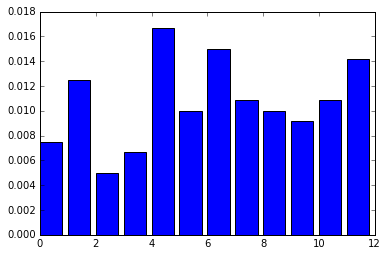

In [11]:
import matplotlib.pyplot as plt
plt.bar(np.arange(N),100*true_quality/SZ)
plt.show()

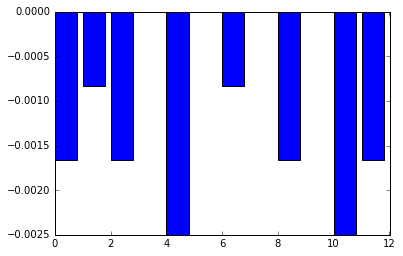

In [12]:
plt.bar(np.arange(N),100*(true_quality-measured_quality)/SZ)
plt.show()